In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [2]:
# Abrir o dataset
df_pontuacao = pd.read_csv('datasets/pontuacao.csv')

In [3]:
# Checar a estrutura do dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# Visualizar as primeiras linhas do dataset
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [5]:
# Visualizar as últimas linhas do dataset
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA - Analise exploratória dos dados

In [6]:
# Estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

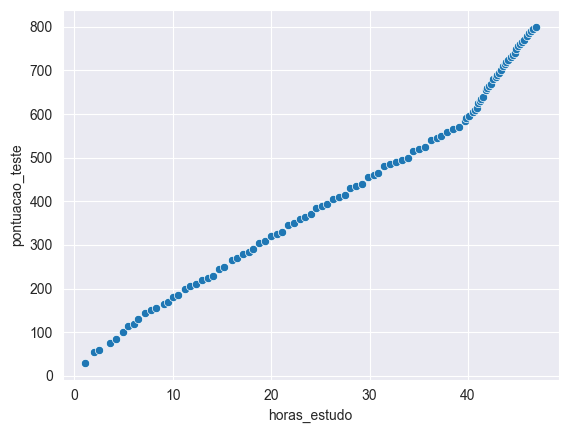

In [7]:
# Plotar a distribuição das variáveis
# x = horas de estudo
# y = pontuação_teste
sns.scatterplot(x='horas_estudo', y='pontuacao_teste', data=df_pontuacao)

<Axes: ylabel='horas_estudo'>

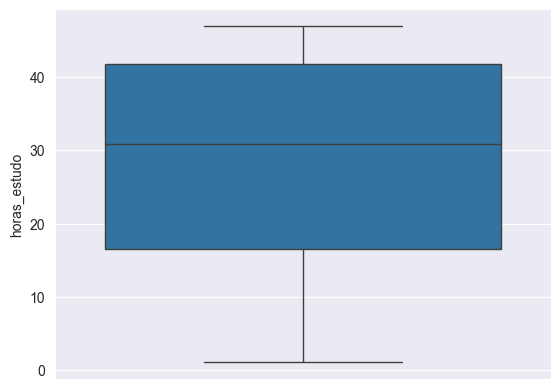

In [8]:
# Verificar se tenmos outliers
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

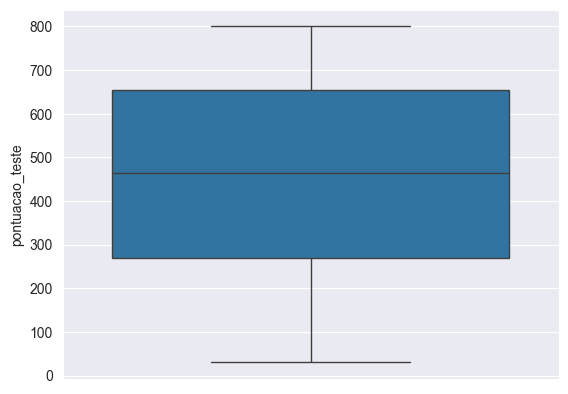

In [9]:
# Verificar se temos outliers
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

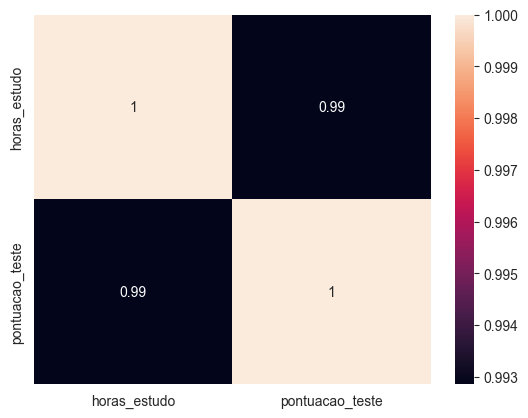

In [10]:
# Verificar correlação entre as variáveis - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

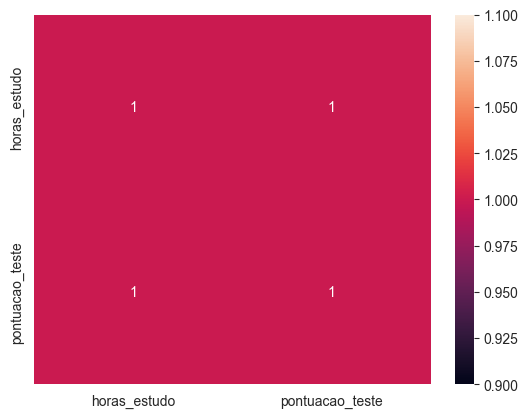

In [11]:
# Verificar correlação entre as variáveis - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

<Axes: >

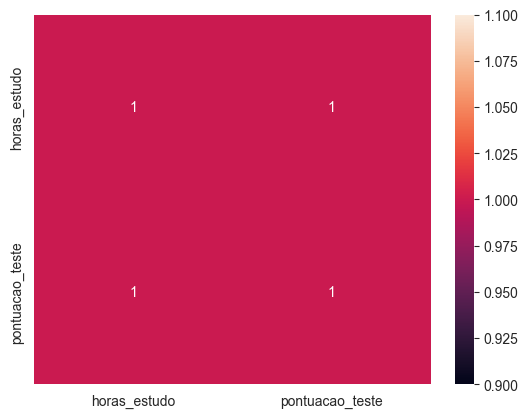

In [12]:
# Verificar correlação entre as variáveis - Kendall
sns.heatmap(df_pontuacao.corr('kendall'), annot=True)

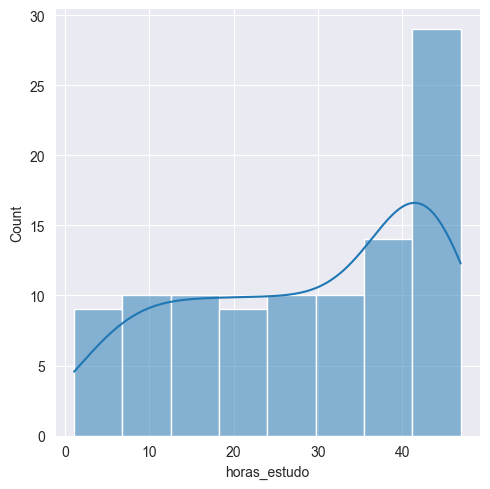

In [52]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo', kde=True)

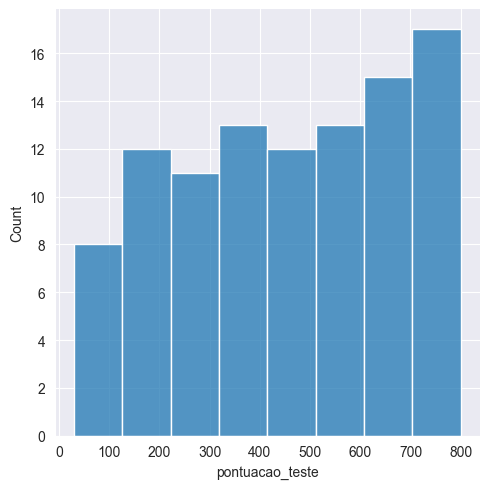

In [50]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste', kde=False)

### Treinamento do modelo

In [16]:
# Dividir os dados em treino e teste   
# Quando temos uma apenas uma feature, precisamos transformar o array em uma matriz
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [17]:
# Treinar o modelo
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [19]:
# Treinar o modelo
# Algoritmo de treinamento de regressão linear
reg_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Impriimir a equação da reta
# y = ax + b
print('A equação da reta é: y = {:4f}x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é: y = 15.642619x + 8.476601


In [21]:
# Validar o modelo - Metricas
# Prever dos valores com base no modelo treinado
y_pred = reg_model.predict(X_test)


In [22]:
# Calcular metrica R-squared ou coeficiente de determinação
# R2 representa a proporção da variância para a variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [23]:
# Calcular metrica MAE - Mean Absolute Error
# MAE é a média do valor absoluto dos erros
# Quanto menor o valor, melhor
# Quanto maior o valor, pior
# Quanto mais próximo de zero, melhor
# MAE = 1/n * Σ|y - y'|
# Media dos valores absolutos das diferenças entre os valores reais e os valores previstos
# MAE é menos sensível a outliers
# MAE é a métrica mais comum para problemas de regressão
mean_absolute_error(y_test, y_pred)

22.957470277134615

In [24]:
# MSE - Mean Squared Error
# MSE é a média do quadrado dos erros
# Quanto menor o valor, melhor
# MSE = 1/n * Σ(y - y')^2
# Média dos quadrados das diferenças entre os valores reais e os valores previstos
# Não é uma métrica intuitiva
# MSE é mais sensível a outliers
# MSE = Media (y_test - y_pred)^2
mean_squared_error(y_test, y_pred)

766.9972992416427

In [26]:
# RMSE - Root Mean Squared Error
# RMSE é a raiz quadrada da média do quadrado dos erros
# Quanto menor o valor, melhor
# RMSE = sqrt(MSE)
# RMSE = sqrt(Media (y_test - y_pred)^2)
# RMSE é a métrica mais comum para problemas de regressão
# RMSE é a métrica mais intuitiva
# RMSE é mais sensível a outliers
mean_squared_error(y_test, y_pred, squared=False)

/Users/devdanalmeida/.local/share/virtualenvs/regressao_linear_simples-dMwdb3Ty/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


27.69471608884342

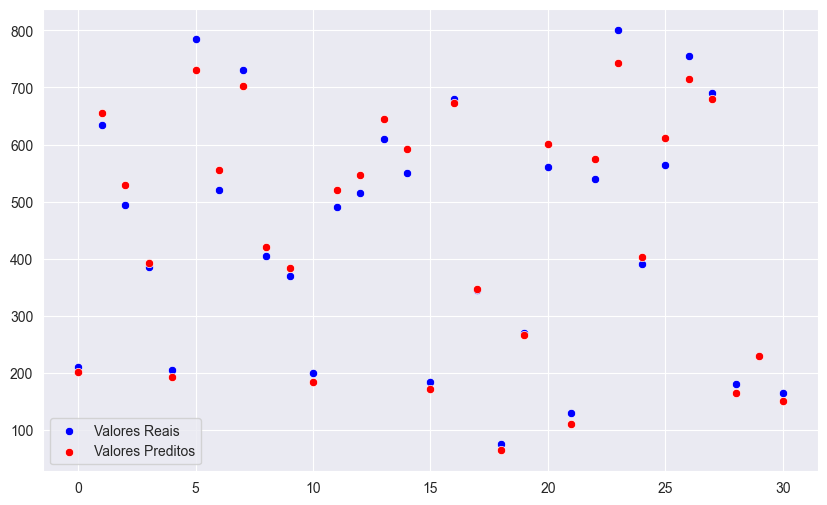

In [28]:
# Analise gráfica
x_ax = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_ax, y=y_test.reshape(-1) , label='Valores Reais', color='blue')
sns.scatterplot(x=x_ax, y=y_pred.reshape(-1), label='Valores Preditos', color='red')
plt.legend()
plt.show()  

In [29]:
# Calcular os resíduos
# Resíduos são as diferenças entre os valores reais e os valores previstos
residuos = y_test - y_pred

In [31]:
# Calcular a distribuição dos resíduos
# Standardization
# Para cada valor, subtrair a média e dividir pelo desvio padrão
# (X - Media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)


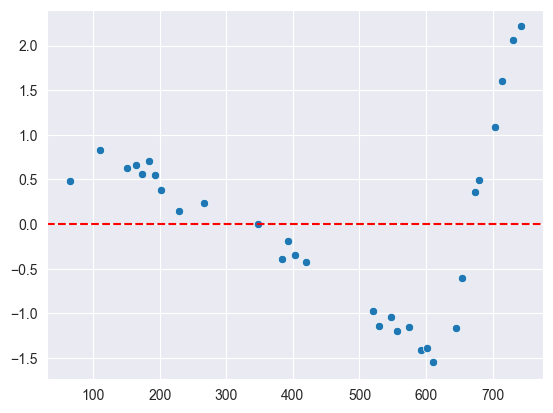

In [34]:
# Verificar linearidade dos modelo
# Se os resíduos não são aleatórios, o modelo não é linear
# Se os residuos estiver entre -2 e 2, o modelo é linear - indica que os resíduos estão distribuídos normalmente
# Verificar se os resíduos estão distribuídos normalmente
# Verificar homocedasticidade das variancias (homoscedasticity)
# Valores estiver em torno da reta, indica que os resíduos estão distribuídos normalmente caso contrário, o modelo não é linear
# Se tiver alguma tendência ou padrão (forma um funil ou cone), indica que o modelo não é linear
# heterocedasticidade - variancias diferentes
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0, color='r', linestyle='--')

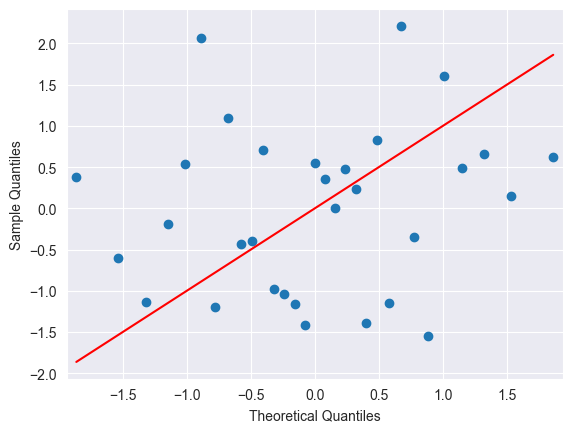

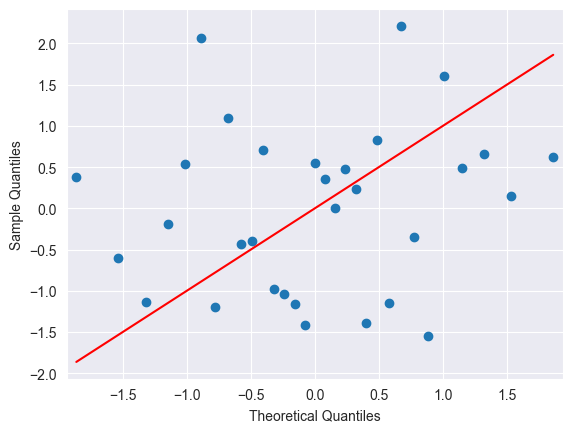

In [35]:
# Checar se residuos seguem uma distribuição normal
# QQ-Plot (Quantile-Quantile Plot)
# Se os pontos estiverem próximos da linha, indica que os resíduos estão distribuídos normalmente
# Se os pontos estiverem longe da linha, indica que os resíduos não estão distribuídos normalmente
qqplot(residuos_std, line='s')

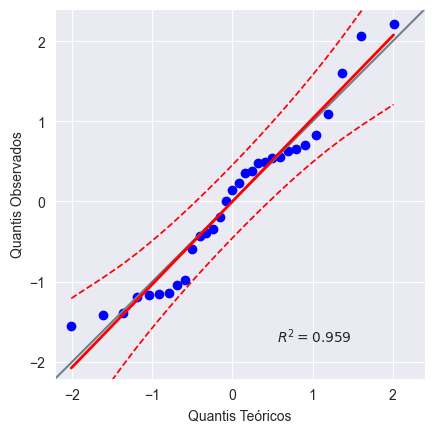

In [39]:
# Checar se residuos seguem uma distribuição normal
# QQ-Plot (Quantile-Quantile Plot)
# Se os pontos estiverem próximos da linha, indica que os resíduos estão distribuídos normalmente
# Se os pontos estiverem longe da linha, indica que os resíduos não estão distribuídos normalmente
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.show()

- Resultados do modelo
- O modelo não está bom, 
- O modelo não irá fazer boas predições

In [42]:
# Teste de normalidade dos resíduos
# Shapiro-Wilk Test
# H0: A amostra é proveniente de uma distribuição normal
# H1: A amostra não é proveniente de uma distribuição normal
# Quanto maior o valor-p, mais evidências temos para não rejeitar a hipótese nula
# Se o valor-p for menor que 0.05, rejeitamos a hipótese nula
# Se o valor-p for maior que 0.05, não rejeitamos a hipótese nula
# Se o valor-p for menor que 0.05, os resíduos não estão distribuídos normalmente
# Se o valor-p for maior que 0.05, os resíduos estão distribuídos normalmente
# Se o p-valor for menor que 0.05, não rejeitamos a hipótese nula
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print('Estatística do teste: {} e p-valor {}'.format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.9500532226161759 e p-valor 0.15663817850304967


In [43]:
# Teste de normalidade dos resíduos
# Kolmogorov-Smirnov Test
# H0: A amostra é proveniente de uma distribuição normal
# H1: A amostra não é proveniente de uma distribuição normal
# Quanto maior o valor-p, mais evidências temos para não rejeitar a hipótese nula
# Se o valor-p for menor que 0.05, rejeitamos a hipótese nula
# Se o valor-p for maior que 0.05, não rejeitamos a hipótese nula
# Se o valor-p for menor que 0.05, os resíduos não estão distribuídos normalmente
# Se o valor-p for maior que 0.05, os resíduos estão distribuídos normalmente
# Se o p-valor for menor que 0.05, não rejeitamos a hipótese nula
stat_kstest, p_valor_kstest = kstest(residuos.reshape(-1), 'norm')
print('Estatística do teste: {} e p-valor {}'.format(stat_kstest, p_valor_kstest))

Estatística do teste: 0.48355808450512827 e p-valor 3.395368995814077e-07


# Fazer predições com o modelo treinado

In [45]:
# Se eu estudar 30.4 horas, qual será a minha pontuação no teste?
reg_model.predict([[30.4]])

array([[484.01220436]])

- O modelo não está bom, ele deu uma predição de 24 pontos acima, mas isso já era esperado

In [ ]:
# Quantas horas de estudo são necessárias para tirar 600 pontos no teste?
# y = ax + b
# x = (y - b) / a
# x = (600 - b) / a
# x = (600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

In [47]:
# # Quantas horas de estudo são necessárias para tirar 600 pontos no teste?
# y = ax + b
# Y - b = ax
# (Y - b) / a = x
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0] 

37.81485802710669

# Salvar modelo para uso futuro

In [49]:
import joblib
joblib.dump(reg_model, './modelo_regressao_linear.pkl')

['./modelo_regressao_linear.pkl']